In [3]:
import sys
!{sys.executable} -m pip install xarray netcdf4

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -------------------------------------- - 1.3/1.4 MB 9.6 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 7.9 MB/s  0:00:00
   ---------------------------------------- 0.0/7.1 MB ? eta -:--:--
   -------------------- ------------------- 3.7/7.1 MB 18.2 MB/s eta 0:00:01
   ---------------------------------------- 7.1/7.1 MB 20.1 MB/s  0:00:00

   ------------- -------------------------- 1/3 [netcdf4]
   ------------- -------------------------- 1/3 [netcdf4]
   ------------- -------------------------- 1/3 [netcdf4]
   ------------- -------------------------- 1/3 [netcdf4]
   ------------- -------------------------- 1/3 [netcdf4]
   ------------- -------------------------- 1/3 [netcdf4]
   ------------- -------------------------- 1/3 [netcdf4]
   -------------------------- ------------- 2/3 [xarray]
   -------------------------- ------------- 2/3 [xarray]
   -------------------------- -----------

In [1]:
import pandas as pd
import xarray as xr # for reading the air temperature data
import numpy as np 
from IPython.lib.display import Audio # for playing sound in notebook
import matplotlib.pyplot as plt
import glob


In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path
import glob
import subprocess
import sys

def install_package(package):
    """Automatically installs a Python package"""
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Tries to import dask; if it doesn't exist, installs it
try:
    import dask
except ImportError:
    install_package("dask")
    import dask

In [2]:
# Path to your data
path_data = r"C:/Users/rafaq/OneDrive/Documentos/IU/Travis_project/data_Era5"

# List the files
files = sorted(glob.glob(f"{path_data}/*.nc"))
print(f"Found {len(files)} files")

# Open all files in a SIMPLE way (without dask)
print("Opening files...")
datasets = []
for file in files:
    ds_temp = xr.open_dataset(file)
    datasets.append(ds_temp)

# Merge everything
print("Merging files...")
ds = xr.concat(datasets, dim='time')

# Show dataset info
print("\nData loaded!")
print(ds)


Found 42 files
Opening files...
Merging files...


C:\Users\rafaq\AppData\Local\Temp\ipykernel_39300\3130508667.py:17: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'valid_time' ('valid_time',) The recommendation is to set join explicitly for this case.
  ds = xr.concat(datasets, dim='time')



Data loaded!
<xarray.Dataset> Size: 2GB
Dimensions:     (time: 42, valid_time: 23388, latitude: 15, longitude: 17)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 187kB 1940-01-01 ... 1980-12-31
  * latitude    (latitude) float64 120B -20.0 -20.25 -20.5 ... -23.25 -23.5
  * longitude   (longitude) float64 136B -44.8 -44.55 -44.3 ... -41.05 -40.8
    number      int64 8B 0
    expver      (valid_time) object 187kB nan '0001' '0001' ... nan nan nan
Dimensions without coordinates: time
Data variables:
    t2m         (time, valid_time, latitude, longitude) float32 1GB 295.7 ......
    mx2t        (time, valid_time, latitude, longitude) float32 1GB nan ... nan
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-11-12T23:32 GRIB t

Found 42 files
  ⚠️  Skipping duplicate: era5_max_temp_RJ_1940.nc
✓ After removing duplicates: 41 files

Opening and concatenating files...
  Processing file 1/41...
  Processing file 6/41...
  Processing file 11/41...
  Processing file 16/41...
  Processing file 21/41...
  Processing file 26/41...
  Processing file 31/41...
  Processing file 36/41...
  Processing file 41/41...

Concatenating...
✓ Data loaded!
  Total days: 14976

EXTRACTING DATA FOR RIO DE JANEIRO

Exact coordinates of the extracted point:
  Latitude: -23.00°
  Longitude: -43.30°

Period: 1940-01-01T00:00:00.000000000 to 1980-12-31T00:00:00.000000000
Total days: 14976

Mean temperature: 26.0°C
Minimum temperature: 17.1°C
Maximum temperature: 36.1°C

PLOTTING TIME SERIES

✓ Plot saved: temperature_rio.png
✓ Data saved: temperature_rio_data.npy

✅ DONE! Data extracted successfully!

Next step: Apply FFT to analyze frequencies! 🎵


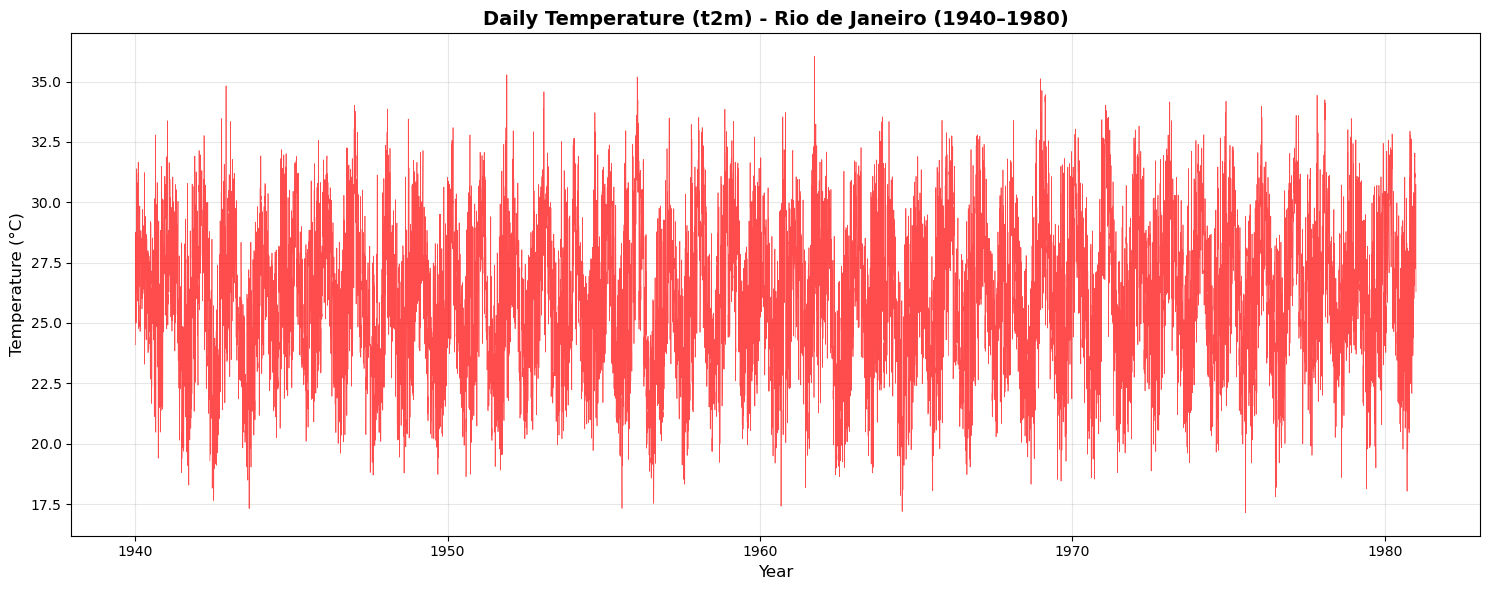

In [3]:
import xarray as xr
import glob
import numpy as np
import matplotlib.pyplot as plt
import re

# ============================================
# STEP 1: OPEN DATA
# ============================================
path_data = r"C:/Users/rafaq/OneDrive/Documentos/IU/Travis_project/data_Era5"

files = sorted(glob.glob(f"{path_data}/*.nc"))
print(f"Found {len(files)} files")

# Remove duplicates
filtered_files = []
seen_years = set()

for file in files:
    name = file.split('\\')[-1]
    match = re.search(r'_(\d{4})\.nc', name)
    if match:
        year = match.group(1)
        if year in seen_years:
            print(f"  ⚠️  Skipping duplicate: {name}")
            continue
        seen_years.add(year)
        filtered_files.append(file)

files = filtered_files
print(f"✓ After removing duplicates: {len(files)} files\n")

# ============================================
# STEP 2: CONCATENATE ALL YEARS
# ============================================
print("Opening and concatenating files...")

datasets = []
for i, file in enumerate(files):
    ds = xr.open_dataset(file)
    # Rename 'valid_time' to 'time' to simplify concatenation
    ds = ds.rename({'valid_time': 'time'})
    datasets.append(ds)
    if i % 5 == 0:
        print(f"  Processing file {i+1}/{len(files)}...")

# Concatenate along time dimension
print("\nConcatenating...")
ds_complete = xr.concat(datasets, dim='time')

print(f"✓ Data loaded!")
print(f"  Total days: {len(ds_complete.time)}")

# ============================================
# STEP 3: EXTRACT POINT FOR RIO DE JANEIRO
# ============================================
print("\n" + "=" * 70)
print("EXTRACTING DATA FOR RIO DE JANEIRO")
print("=" * 70)

# Rio de Janeiro coordinates
lat_rio = -22.9
lon_rio = -43.2

# Select nearest grid point
point = ds_complete.sel(latitude=lat_rio, longitude=lon_rio, method='nearest')

print(f"\nExact coordinates of the extracted point:")
print(f"  Latitude: {float(point.latitude.values):.2f}°")
print(f"  Longitude: {float(point.longitude.values):.2f}°")

# Extract temperature series
temperature = point['t2m'].values

# Convert from Kelvin to Celsius
temperature_celsius = temperature - 273.15

print(f"\nPeriod: {point.time.values[0]} to {point.time.values[-1]}")
print(f"Total days: {len(temperature_celsius)}")
print(f"\nMean temperature: {np.nanmean(temperature_celsius):.1f}°C")
print(f"Minimum temperature: {np.nanmin(temperature_celsius):.1f}°C")
print(f"Maximum temperature: {np.nanmax(temperature_celsius):.1f}°C")

# ============================================
# STEP 4: PLOT TIME SERIES
# ============================================
print("\n" + "=" * 70)
print("PLOTTING TIME SERIES")
print("=" * 70)

# Create array of years for X-axis
years = np.arange(1940, 1940 + len(temperature_celsius)/365.25, 1/365.25)[:len(temperature_celsius)]

plt.figure(figsize=(15, 6))
plt.plot(years, temperature_celsius, linewidth=0.5, color='red', alpha=0.7)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.title('Daily Temperature (t2m) - Rio de Janeiro (1940–1980)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('temperature_rio.png', dpi=150)
print("\n✓ Plot saved: temperature_rio.png")

# Save data for FFT analysis
np.save('temperature_rio_data.npy', temperature_celsius)
print("✓ Data saved: temperature_rio_data.npy")

print("\n" + "=" * 70)
print("✅ DONE! Data extracted successfully!")
print("=" * 70)
print("\nNext step: Apply FFT to analyze frequencies! 🎵")


In [4]:
"""
FFT Analysis and Filtering - Temperature in Rio de Janeiro (1940–1980)
Based on notebooks by Professor Travis O'Brien
Course: Advanced Earth Science Data Analysis
"""

import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Style configuration
plt.style.use('seaborn-v0_8-poster')

print("=" * 70)
print("FFT ANALYSIS AND FILTERING - TEMPERATURE IN RIO DE JANEIRO")
print("=" * 70)

# ============================================
# STEP 1: LOAD DATA
# ============================================
print("\n📂 Loading data...")
temperature = np.load('temperatura_rio_dados.npy')

# Basic information
n_days = len(temperature)
print(f"✓ Total number of days: {n_days}")
print(f"  Mean temperature: {np.nanmean(temperature):.1f}°C")
print(f"  Temperature std: {np.nanstd(temperature):.1f}°C")

# Sampling rate (1 sample per day)
fs = 1  # 1 sample per day
dt = 1  # time step of 1 day

# ============================================
# STEP 2: APPLY FFT
# ============================================
print("\n" + "=" * 70)
print("APPLYING FFT (Fast Fourier Transform)")
print("=" * 70)


FFT ANALYSIS AND FILTERING - TEMPERATURE IN RIO DE JANEIRO

📂 Loading data...
✓ Total number of days: 14976
  Mean temperature: 26.0°C
  Temperature std: 3.1°C

APPLYING FFT (Fast Fourier Transform)


In [5]:
# Remove the mean (detrend)
temperature_detrended = temperature - np.nanmean(temperature)

# Compute FFT
fft_result = fft.fft(temperature_detrended)

# Compute corresponding frequencies
freqs = fft.fftfreq(n_days, d=dt)  # frequency in cycles/day

# Keep only positive frequencies
positive_freq_mask = freqs > 0
freqs_positive = freqs[positive_freq_mask]
fft_positive = fft_result[positive_freq_mask]

# Compute power (squared amplitude)
power = np.abs(fft_positive)**2

# Convert frequencies to periods in years
periods_years = 1 / freqs_positive / 365.25  # period in years

print(f"\n✓ FFT computed!")
print(f"  Number of frequencies: {len(freqs_positive)}")
print(f"  Shortest period: {periods_years.max():.2f} years")
print(f"  Longest period: {periods_years.min():.2f} years")



✓ FFT computed!
  Number of frequencies: 7487
  Shortest period: 41.00 years
  Longest period: 0.01 years



PLOTTING POWER SPECTRUM
✓ Plot saved: fft_full_analysis.png


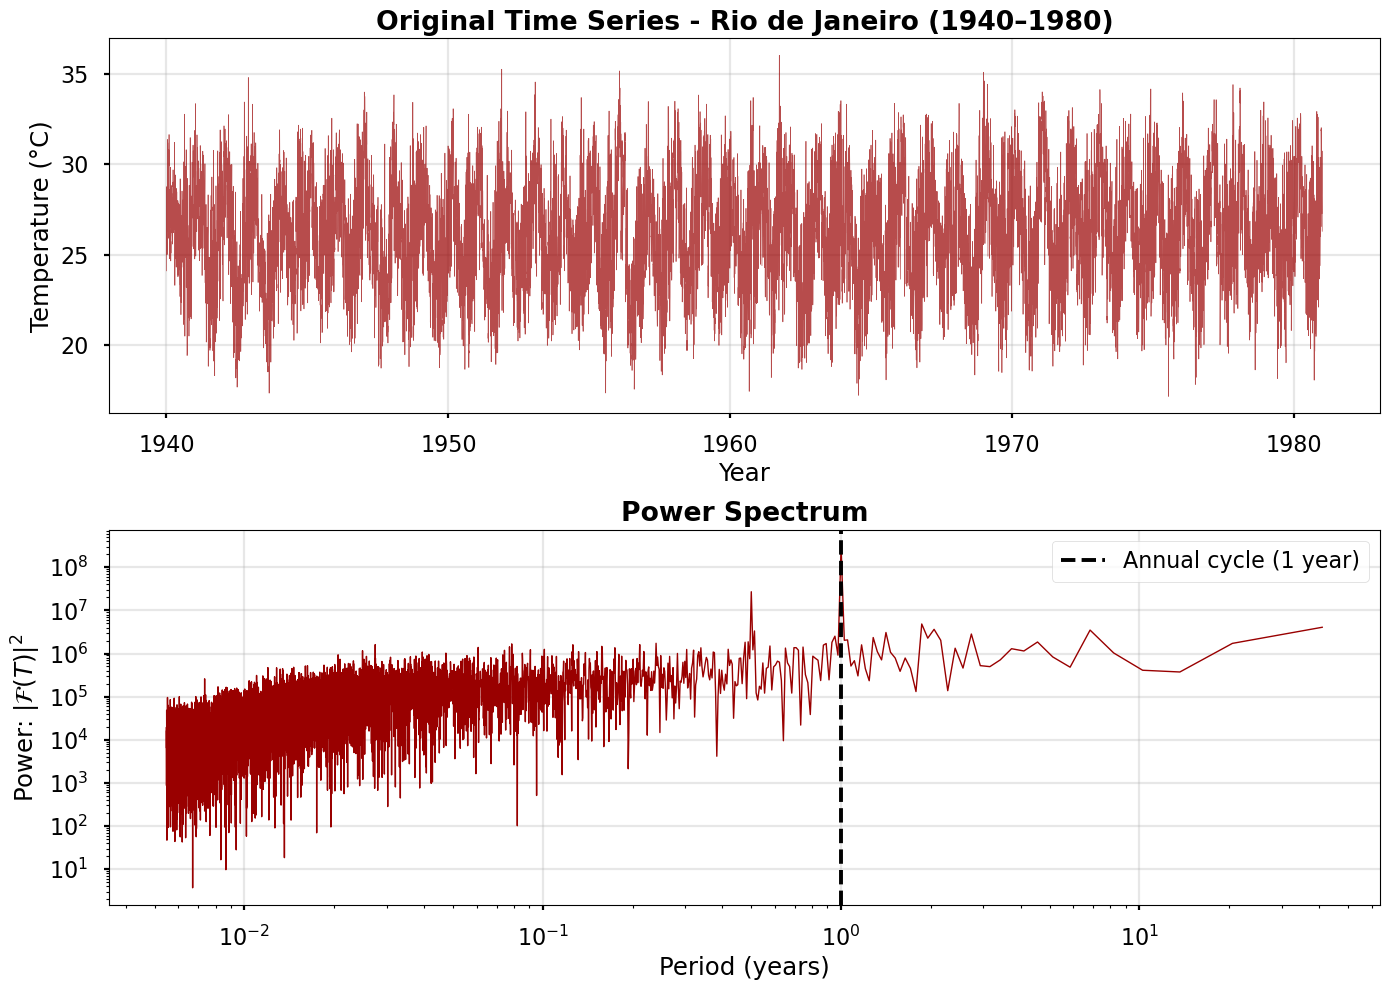

In [6]:
# ============================================
# STEP 3: PLOT POWER SPECTRUM
# ============================================
print("\n" + "=" * 70)
print("PLOTTING POWER SPECTRUM")
print("=" * 70)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Original time series
ax1.plot(np.arange(n_days)/365.25 + 1940, temperature,
         linewidth=0.5, color='#990000', alpha=0.7)
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature (°C)')
ax1.set_title('Original Time Series - Rio de Janeiro (1940–1980)',
              fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot 2: Power spectrum
ax2.plot(periods_years, power, color='#990000', linewidth=1)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel('Period (years)')
ax2.set_ylabel('Power: $|\\mathcal{F}(T)|^2$')
ax2.set_title('Power Spectrum', fontweight='bold')
ax2.axvline(1, color='black', linestyle='--', label='Annual cycle (1 year)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.plot()
plt.savefig('fft_full_analysis.png', dpi=150, bbox_inches='tight')
print("✓ Plot saved: fft_full_analysis.png")


In [7]:
# ============================================
# STEP 4: IDENTIFY MAIN FREQUENCIES
# ============================================
print("\n" + "=" * 70)
print("MAIN DETECTED FREQUENCIES")
print("=" * 70)

# Find the 5 highest peaks
n_peaks = 5
idx_peaks = np.argsort(power)[-n_peaks:][::-1]

print(f"\nTop {n_peaks} dominant frequencies:")
for i, idx in enumerate(idx_peaks, 1):
    period = periods_years[idx]
    power_value = power[idx]
    print(f"  {i}. Period: {period:.3f} years | Power: {power_value:.2e}")



MAIN DETECTED FREQUENCIES

Top 5 dominant frequencies:
  1. Period: 1.000 years | Power: 2.99e+08
  2. Period: 0.500 years | Power: 2.71e+07
  3. Period: 1.864 years | Power: 4.84e+06
  4. Period: 41.002 years | Power: 4.06e+06
  5. Period: 2.050 years | Power: 3.64e+06


In [8]:
# ============================================
# STEP 5: LOW-PASS FILTER (Butterworth)
# ============================================
print("\n" + "=" * 70)
print("APPLYING LOW-PASS FILTER (Butterworth)")
print("=" * 70)

# Cutoff period: 1 year (removes variations shorter than 1 year)
cutoff_period_years = 1
cutoff_freq = 1 / (cutoff_period_years * 365.25)  # in cycles/day

# Nyquist frequency
nyquist_freq = 0.5 * fs

# Normalized frequency
Wn = cutoff_freq / nyquist_freq

print(f"\nFilter parameters:")
print(f"  Cutoff period: {cutoff_period_years} years")
print(f"  Cutoff frequency: {cutoff_freq:.6f} cycles/day")
print(f"  Normalized frequency (Wn): {Wn:.6f}")

# Create 5th-order Butterworth low-pass filter
order = 5
b, a = butter(order, Wn, btype='low')

# Apply filter (filtfilt applies it twice for zero phase shift)
temp_lowpass = filtfilt(b, a, temperature)

print(f"✓ Low-pass filter applied!")



APPLYING LOW-PASS FILTER (Butterworth)

Filter parameters:
  Cutoff period: 1 years
  Cutoff frequency: 0.002738 cycles/day
  Normalized frequency (Wn): 0.005476
✓ Low-pass filter applied!


In [9]:
# ============================================
# STEP 6: HIGH-PASS FILTER
# ============================================
print("\n" + "=" * 70)
print("CALCULATING HIGH-FREQUENCY COMPONENT")
print("=" * 70)

# The high-pass component is simply the original signal minus the low-pass signal
temp_highpass = temperature - temp_lowpass

print("✓ High-frequency component computed!")



CALCULATING HIGH-FREQUENCY COMPONENT
✓ High-frequency component computed!



PLOTTING FILTERING RESULTS
✓ Plot saved: complete_filtering.png


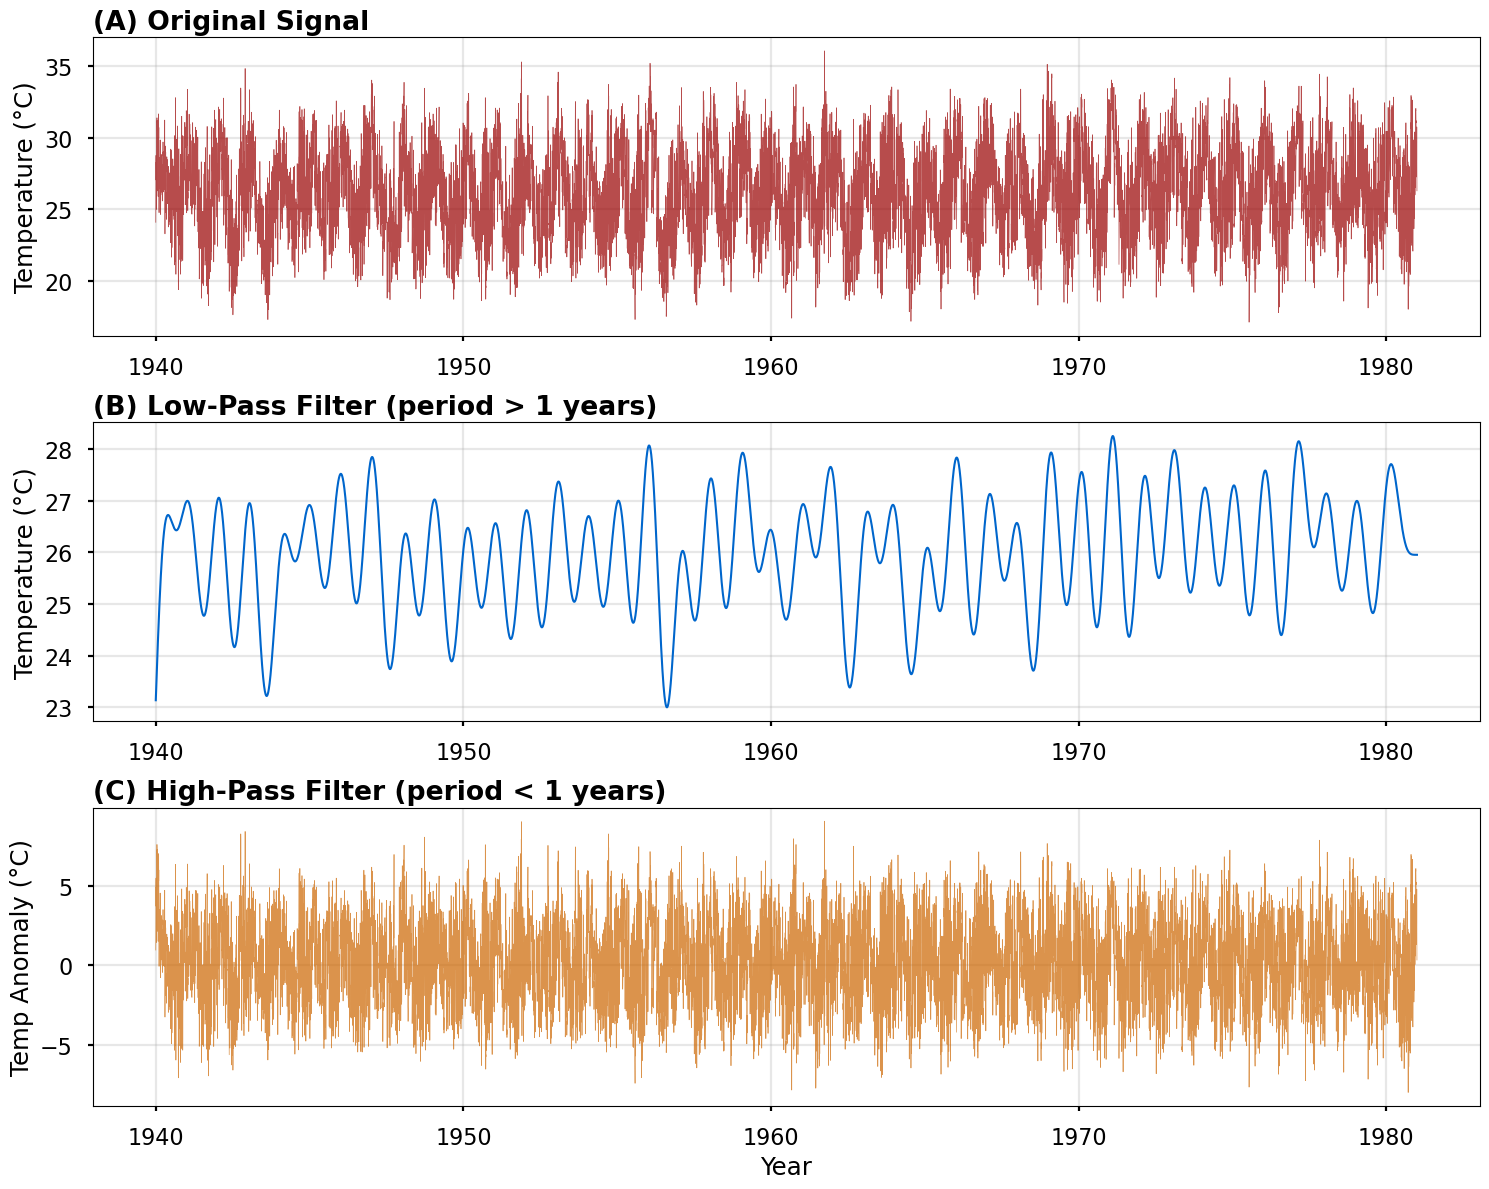

In [10]:
# ============================================
# STEP 7: PLOT FILTERING RESULTS
# ============================================
print("\n" + "=" * 70)
print("PLOTTING FILTERING RESULTS")
print("=" * 70)

years = np.arange(n_days) / 365.25 + 1940

fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# Plot 1: Original signal
axes[0].plot(years, temperature, linewidth=0.5, color='#990000', alpha=0.7)
axes[0].set_ylabel('Temperature (°C)')
axes[0].set_title('(A) Original Signal', fontweight='bold', loc='left')
axes[0].grid(True, alpha=0.3)

# Plot 2: Low-pass filter (long-term trends)
axes[1].plot(years, temp_lowpass, linewidth=1.5, color='#0066CC')
axes[1].set_ylabel('Temperature (°C)')
axes[1].set_title(f'(B) Low-Pass Filter (period > {cutoff_period_years} years)',
                  fontweight='bold', loc='left')
axes[1].grid(True, alpha=0.3)

# Plot 3: High-pass filter (short-term variability)
axes[2].plot(years, temp_highpass, linewidth=0.5, color='#CC6600', alpha=0.7)
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Temp Anomaly (°C)')
axes[2].set_title(f'(C) High-Pass Filter (period < {cutoff_period_years} years)',
                  fontweight='bold', loc='left')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('complete_filtering.png', dpi=150, bbox_inches='tight')
print("✓ Plot saved: complete_filtering.png")



COMPARISON: ORIGINAL vs FILTERED


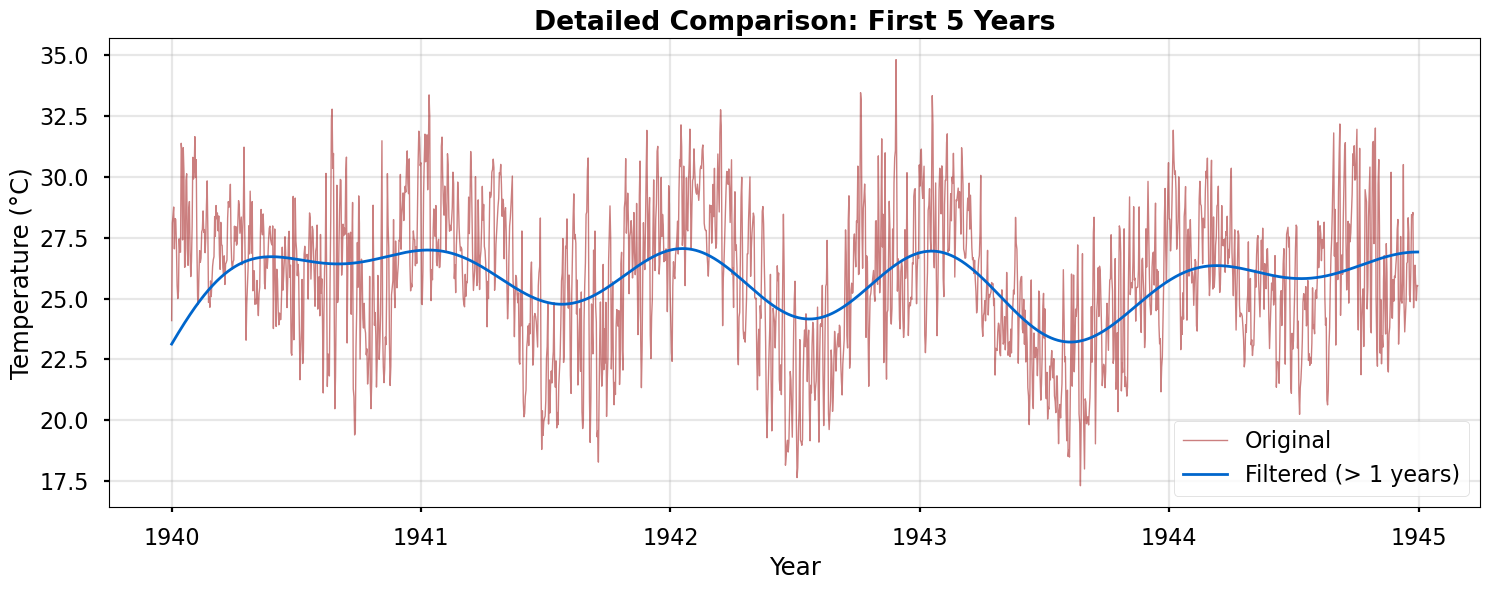

In [11]:
# ============================================
# STEP 8: DIRECT COMPARISON
# ============================================
print("\n" + "=" * 70)
print("COMPARISON: ORIGINAL vs FILTERED")
print("=" * 70)

fig, ax = plt.subplots(figsize=(15, 6))

# Plot a 5-year window to visualize details more clearly
start = 0
end = int(5 * 365.25)  # first 5 years

years_zoom = years[start:end]
temp_zoom = temperature[start:end]
temp_low_zoom = temp_lowpass[start:end]

ax.plot(years_zoom, temp_zoom, linewidth=1, color='#990000',
        alpha=0.5, label='Original')
ax.plot(years_zoom, temp_low_zoom, linewidth=2, color='#0066CC',
        label=f'Filtered (> {cutoff_period_years} years)')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Detailed Comparison: First 5 Years', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('comparison_original_filtered.png', dpi=150, bbox_inches='tight')
# print("✓ Plot saved: comparison_original_filtered.png")


In [12]:
# ============================================
# STEP 9: SAVE FILTERED DATA
# ============================================
print("\n" + "=" * 70)
print("SAVING PROCESSED DATA")
print("=" * 70)

np.save('temperature_lowpass.npy', temp_lowpass)
np.save('temperature_highpass.npy', temp_highpass)

print("✓ Files saved:")
print("  - temperature_lowpass.npy")
print("  - temperature_highpass.npy")

# ============================================
# FINAL SUMMARY
# ============================================
print("\n" + "=" * 70)
print("✅ ANALYSIS SUCCESSFULLY COMPLETED!")
print("=" * 70)

print("\n📊 Analysis summary:")
print(f"  • Period analyzed: 1940–1980 ({n_days} days)")
print(f"  • Dominant frequency: Annual cycle (1 year)")
print(f"  • Low-pass filter: > {cutoff_period_years} years")
print(f"  • Original variance: {np.var(temperature):.2f} °C²")
print(f"  • Low-pass variance: {np.var(temp_lowpass):.2f} °C²")
print(f"  • High-pass variance: {np.var(temp_highpass):.2f} °C²")

print("\n📁 Generated files:")
print("  1. fft_full_analysis.png")
print("  2. complete_filtering.png")
print("  3. comparison_original_filtered.png")
print("  4. temperature_lowpass.npy")
print("  5. temperature_highpass.npy")

print("\n🎵 Next step: Sonify the data (convert to audio)!")
print("=" * 70)






SAVING PROCESSED DATA
✓ Files saved:
  - temperature_lowpass.npy
  - temperature_highpass.npy

✅ ANALYSIS SUCCESSFULLY COMPLETED!

📊 Analysis summary:
  • Period analyzed: 1940–1980 (14976 days)
  • Dominant frequency: Annual cycle (1 year)
  • Low-pass filter: > 1 years
  • Original variance: 9.40 °C²
  • Low-pass variance: 1.12 °C²
  • High-pass variance: 6.96 °C²

📁 Generated files:
  1. fft_full_analysis.png
  2. complete_filtering.png
  3. comparison_original_filtered.png
  4. temperature_lowpass.npy
  5. temperature_highpass.npy

🎵 Next step: Sonify the data (convert to audio)!


# DATA SONIFICATION – Temperature in Rio de Janeiro (1940–1980)
Based on the “Sound from Data” notebook by Professor Travis O'Brien
Course: Advanced Earth Science Data Analysis

This script converts temperature data into an audio (WAV) file that can be listened to.
It provides a unique way to *hear* patterns in climate data.



In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import wavfile

print("=" * 80)
print("🎵 DATA SONIFICATION - CONVERTING TEMPERATURE INTO SOUND! 🎵")
print("=" * 80)

🎵 DATA SONIFICATION - CONVERTING TEMPERATURE INTO SOUND! 🎵


In [14]:
# ============================================
# STEP 1: LOAD DATA
# ============================================
print("\n📂 STEP 1: Loading data...")

# Load original data
temperature_original = np.load('temperatura_rio_dados.npy')

# Load filtered data (if you want to sonify them as well)
temperature_lowpass = np.load('temperature_lowpass.npy')
temperature_highpass = np.load('temperature_highpass.npy')

n_days = len(temperature_original)
print(f"✓ Data loaded: {n_days} days ({n_days / 365.25:.1f} years)")



📂 STEP 1: Loading data...
✓ Data loaded: 14976 days (41.0 years)


In [15]:
# ============================================
# STEP 2: CREATE TIMESTAMPS
# ============================================
print("\n📅 STEP 2: Creating time series...")

# Create timestamps for the data (1 sample per day)
start_date = pd.Timestamp('1940-01-01')
end_date = start_date + pd.Timedelta(days=n_days - 1)
time_original = pd.date_range(start=start_date, end=end_date, periods=n_days)

print(f"✓ Period: {time_original[0]} to {time_original[-1]}")



📅 STEP 2: Creating time series...
✓ Period: 1940-01-01 00:00:00 to 1980-12-31 00:00:00


In [16]:
# ============================================
# STEP 3: DEFINE AUDIO PARAMETERS
# ============================================
print("\n🎚️  STEP 3: Setting up audio parameters...")

# Standard audio sampling rate (44.1 kHz = CD quality)
sampling_rate = 44100  # samples per second (Hz)

# Duration of the audio in seconds
# For 41 years of data, we need strong time compression!
duration_seconds = 20  # 20 seconds of audio

print(f"  Sampling rate: {sampling_rate} Hz (CD quality)")
print(f"  Audio duration: {duration_seconds} seconds")
print(f"  Temporal compression: {n_days/365.25:.1f} years → {duration_seconds}s")
print(f"  Acceleration factor: {(n_days/365.25 * 365.25 * 24 * 3600) / duration_seconds:.0f}x")



🎚️  STEP 3: Setting up audio parameters...
  Sampling rate: 44100 Hz (CD quality)
  Audio duration: 20 seconds
  Temporal compression: 41.0 years → 20s
  Acceleration factor: 64696320x


In [17]:
# ============================================
# FUNCTION TO SONIFY DATA
# ============================================
def sonify_data(data, original_time, name="audio"):
    """
    Converts temperature data into a WAV audio file.
    
    Parameters:
    -----------
    data : array
        Temperature data
    original_time : DatetimeIndex
        Original timestamps of the data
    name : str
        Output file name
    """
    
    print(f"\n🎵 Sonifying '{name}'...")

    # Total number of required audio samples
    n_samples = sampling_rate * duration_seconds

    # Create a new time series with the audio sampling rate
    time_resampled = pd.date_range(
        start=original_time[0],
        end=original_time[-1],
        periods=n_samples
    )

    print(f"  Resampling: {len(data)} → {n_samples} samples")

    # Create a pandas Series to facilitate interpolation
    temp_series = pd.Series(data, index=original_time)

    # Resample data to the audio sampling rate using linear interpolation
    temp_resampled = temp_series.reindex(
        temp_series.index.union(time_resampled)
    ).interpolate(method='linear').reindex(time_resampled)

    # Convert to numpy array
    audio_data = temp_resampled.values

    # CRUCIAL STEP: Normalize data to the range [-1, 1]
    # Required to produce a valid audio file

    # 1. Remove mean (center the data)
    audio_data = audio_data - np.nanmean(audio_data)

    # 2. Normalize to [-1, 1]
    audio_data = audio_data / np.nanmax(np.abs(audio_data))

    print(f"  Normalized values: [{np.min(audio_data):.3f}, {np.max(audio_data):.3f}]")

    # Convert to int16 (standard WAV format)
    # Multiply by 32767 (max int16 value)
    audio_int16 = (audio_data * 32767).astype(np.int16)

    # Save WAV file
    filename = f"{name}.wav"
    wavfile.write(filename, sampling_rate, audio_int16)

    print(f"✓ File saved: {filename}")
    print(f"  Duration: {duration_seconds}s | Sampling rate: {sampling_rate}Hz")

    return audio_data, audio_int16


In [18]:
# ============================================
# STEP 4: SONIFY ORIGINAL AND FILTERED DATA
# ============================================
print("\n" + "=" * 80)
print("SONIFYING DIFFERENT VERSIONS OF THE DATA")
print("=" * 80)

# Sonify original data
audio_original, audio_original_int16 = sonify_data(
    temperature_original,
    time_original,
    name="temperature_original"
)

# Sonify low-pass data (long-term trends)
audio_lowpass, audio_lowpass_int16 = sonify_data(
    temperature_lowpass,
    time_original,
    name="temperature_lowpass"
)

# Sonify high-pass data (short-term variability)
audio_highpass, audio_highpass_int16 = sonify_data(
    temperature_highpass,
    time_original,
    name="temperature_highpass"
)



SONIFYING DIFFERENT VERSIONS OF THE DATA

🎵 Sonifying 'temperature_original'...
  Resampling: 14976 → 882000 samples
  Normalized values: [-0.876, 1.000]
✓ File saved: temperature_original.wav
  Duration: 20s | Sampling rate: 44100Hz

🎵 Sonifying 'temperature_lowpass'...
  Resampling: 14976 → 882000 samples
  Normalized values: [-1.000, 0.773]
✓ File saved: temperature_lowpass.wav
  Duration: 20s | Sampling rate: 44100Hz

🎵 Sonifying 'temperature_highpass'...
  Resampling: 14976 → 882000 samples
  Normalized values: [-0.883, 1.000]
✓ File saved: temperature_highpass.wav
  Duration: 20s | Sampling rate: 44100Hz


In [19]:
# ============================================
# STEP 5: CREATE VERSIONS WITH DIFFERENT DURATIONS
# ============================================
print("\n" + "=" * 80)
print("CREATING VERSIONS WITH DIFFERENT DURATIONS")
print("=" * 80)

# Short version (5 seconds) — “faster”
duration_seconds_short = 5
n_samples_short = sampling_rate * duration_seconds_short

print(f"\n🎵 Creating short version ({duration_seconds_short}s)...")

time_short = pd.date_range(
    start=time_original[0],
    end=time_original[-1],
    periods=n_samples_short
)

temp_series = pd.Series(temperature_original, index=time_original)
temp_short = temp_series.reindex(
    temp_series.index.union(time_short)
).interpolate(method='linear').reindex(time_short).values

temp_short = (temp_short - np.nanmean(temp_short)) / np.nanmax(np.abs(temp_short - np.nanmean(temp_short)))
wavfile.write('temperature_short_5s.wav', sampling_rate, (temp_short * 32767).astype(np.int16))
print(f"✓ Saved: temperature_short_5s.wav")

# Long version (60 seconds) — “slower” and more detailed
duration_seconds_long = 60
n_samples_long = sampling_rate * duration_seconds_long

print(f"\n🎵 Creating long version ({duration_seconds_long}s)...")

time_long = pd.date_range(
    start=time_original[0],
    end=time_original[-1],
    periods=n_samples_long
)

temp_long = temp_series.reindex(
    temp_series.index.union(time_long)
).interpolate(method='linear').reindex(time_long).values

temp_long = (temp_long - np.nanmean(temp_long)) / np.nanmax(np.abs(temp_long - np.nanmean(temp_long)))
wavfile.write('temperature_long_60s.wav', sampling_rate, (temp_long * 32767).astype(np.int16))
print(f"✓ Saved: temperature_long_60s.wav")



CREATING VERSIONS WITH DIFFERENT DURATIONS

🎵 Creating short version (5s)...
✓ Saved: temperature_short_5s.wav

🎵 Creating long version (60s)...
✓ Saved: temperature_long_60s.wav



VISUALIZING WAVEFORMS

✓ Figure saved: audio_waveforms.png


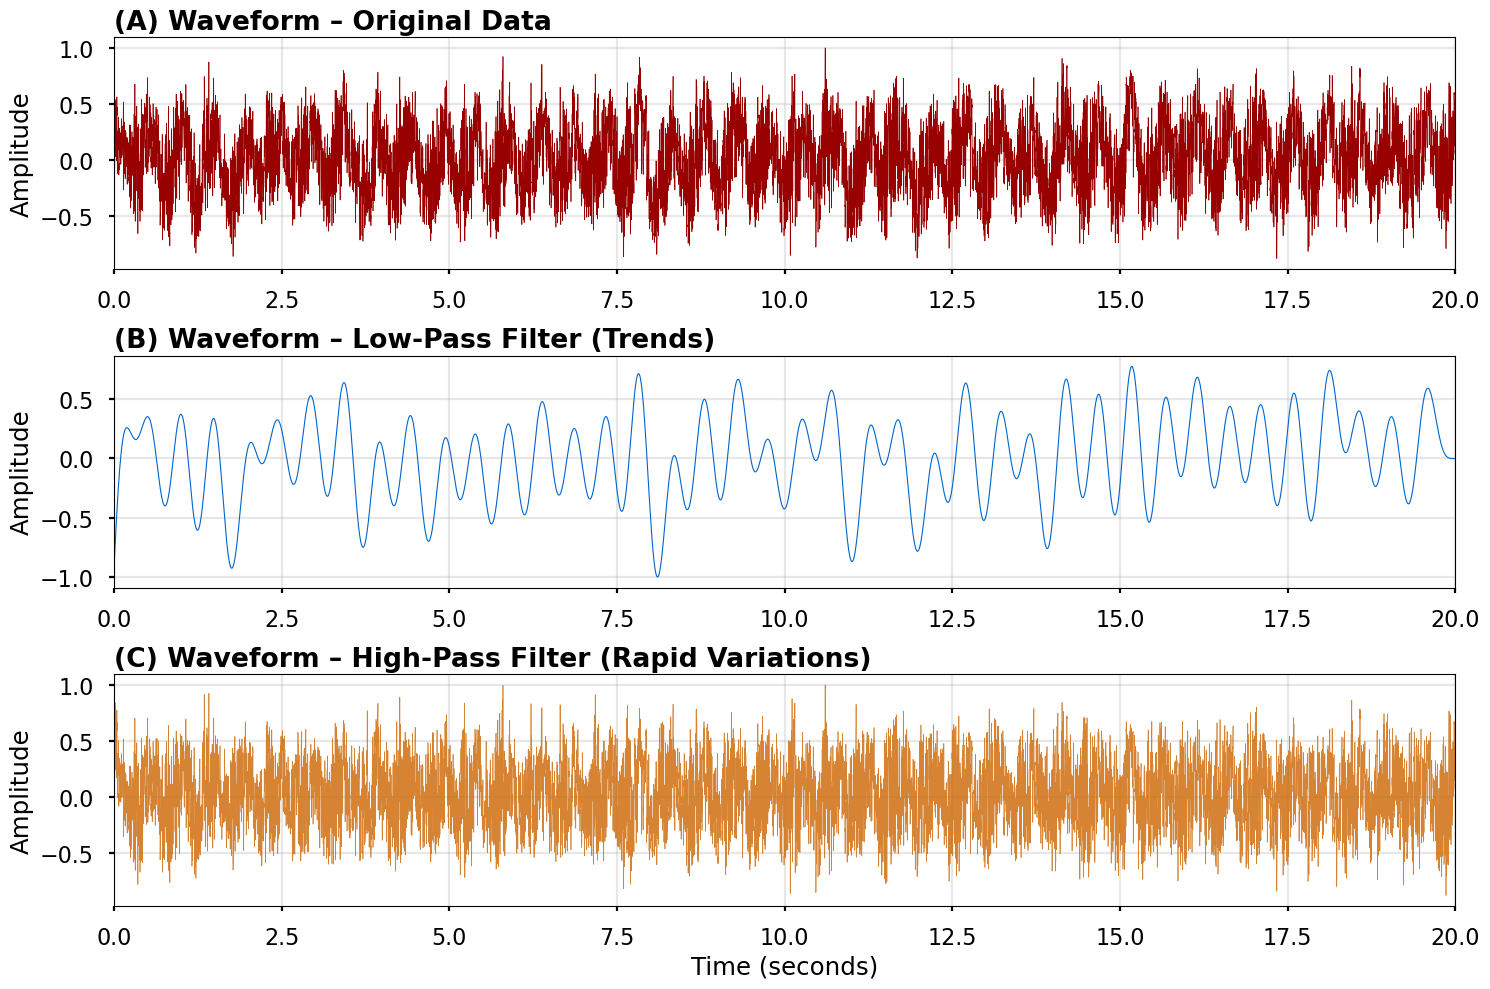

In [20]:
# ============================================
# STEP 6: VISUALIZE WAVEFORMS
# ============================================
print("\n" + "=" * 80)
print("VISUALIZING WAVEFORMS")
print("=" * 80)

fig, axes = plt.subplots(3, 1, figsize=(15, 10))

# Plot 1: Original
time_audio = np.linspace(0, duration_seconds, len(audio_original))
axes[0].plot(time_audio, audio_original, linewidth=0.5, color='#990000')
axes[0].set_ylabel('Amplitude')
axes[0].set_title('(A) Waveform – Original Data', fontweight='bold', loc='left')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(0, duration_seconds)

# Plot 2: Low-pass
axes[1].plot(time_audio, audio_lowpass, linewidth=0.8, color='#0066CC')
axes[1].set_ylabel('Amplitude')
axes[1].set_title('(B) Waveform – Low-Pass Filter (Trends)', fontweight='bold', loc='left')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(0, duration_seconds)

# Plot 3: High-pass
axes[2].plot(time_audio, audio_highpass, linewidth=0.5, color='#CC6600', alpha=0.8)
axes[2].set_xlabel('Time (seconds)')
axes[2].set_ylabel('Amplitude')
axes[2].set_title('(C) Waveform – High-Pass Filter (Rapid Variations)', fontweight='bold', loc='left')
axes[2].grid(True, alpha=0.3)
axes[2].set_xlim(0, duration_seconds)

plt.tight_layout()
plt.savefig('audio_waveforms.png', dpi=150, bbox_inches='tight')
print("\n✓ Figure saved: audio_waveforms.png")


In [21]:
# ============================================
# FINAL SUMMARY
# ============================================
print("\n" + "=" * 80)
print("✅ SONIFICATION COMPLETED SUCCESSFULLY!")
print("=" * 80)

print("\n🎵 Audio files created:")
print("  1. temperature_original.wav (20s) – Full data")
print("  2. temperature_lowpass.wav (20s) – Long-term trends")
print("  3. temperature_highpass.wav (20s) – Short-term variations")
print("  4. temperature_short_5s.wav (5s) – Fast version")
print("  5. temperature_long_60s.wav (60s) – Detailed version")

print("\n📊 Visualizations:")
print("  1. audio_waveforms.png – Waveforms of all audio signals")

print("\n🎧 How to listen to the audio files:")
print("  • Open the .wav files in any audio player")
print("  • Windows: Windows Media Player, VLC")
print("  • Mac: QuickTime, iTunes")
print("  • Linux: VLC, Audacity")

print("\n🔊 What you will hear:")
print("  • Original: Complex tone with rapid seasonal cycles")
print("  • Low-pass: Smoother tone, long-term trends")
print("  • High-pass: More 'energetic' sound, daily/seasonal variations")

print("\n💡 Tip: Compare the audio files to actually *hear* the different temporal scales!")
print("=" * 80)



✅ SONIFICATION COMPLETED SUCCESSFULLY!

🎵 Audio files created:
  1. temperature_original.wav (20s) – Full data
  2. temperature_lowpass.wav (20s) – Long-term trends
  3. temperature_highpass.wav (20s) – Short-term variations
  4. temperature_short_5s.wav (5s) – Fast version
  5. temperature_long_60s.wav (60s) – Detailed version

📊 Visualizations:
  1. audio_waveforms.png – Waveforms of all audio signals

🎧 How to listen to the audio files:
  • Open the .wav files in any audio player
  • Windows: Windows Media Player, VLC
  • Mac: QuickTime, iTunes
  • Linux: VLC, Audacity

🔊 What you will hear:
  • Original: Complex tone with rapid seasonal cycles
  • Low-pass: Smoother tone, long-term trends
  • High-pass: More 'energetic' sound, daily/seasonal variations

💡 Tip: Compare the audio files to actually *hear* the different temporal scales!
